In [1]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
# Reshape input image data from matrixs to vectors
[n_samples_train, width, height] = np.shape(x_train)
[n_samples_test, width, height] = np.shape(x_test)
x_train = x_train.reshape([n_samples_train, width*height]).astype('float32')
x_test = x_test.reshape([n_samples_test, width*height]).astype('float32')

In [5]:
# Normalize the dataset
x_train /= 255
x_test /= 255

In [6]:
# Convert class vectors to one-hot vector matrices
num_classes = 10    
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [9]:
# In the MINST data, the input dim = 784 and the output dim = 10 
def shallow_NN_model(n_hidden_neurons, output_dim = 10, input_dim = 784):
    start_time = time.time()
    print('Compiling Model ... ')
    model = Sequential()
    # Add a hidden layer with ReLU activation function
    model.add(Dense(n_hidden_neurons, activation='relu', input_dim = input_dim))
    # Add an output layer with softmax activation function for multi-classification problem
    model.add(Dense(output_dim, activation = 'softmax'))
    sgd = SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

In [10]:
epochs = 100
batch  = 256
n_hidden_neurons = 50
model = shallow_NN_model(n_hidden_neurons)
hist_ANN = model.fit(x_train, y_train, epochs=epochs, batch_size=batch, validation_data=(x_test, y_test), verbose=2)

Compiling Model ... 
Model compield in 0.06962895393371582 seconds
Epoch 1/100
235/235 - 2s - loss: 0.3527 - accuracy: 0.8977 - val_loss: 0.1879 - val_accuracy: 0.9453 - 2s/epoch - 10ms/step
Epoch 2/100
235/235 - 1s - loss: 0.1671 - accuracy: 0.9522 - val_loss: 0.1457 - val_accuracy: 0.9574 - 1s/epoch - 5ms/step
Epoch 3/100
235/235 - 1s - loss: 0.1246 - accuracy: 0.9647 - val_loss: 0.1143 - val_accuracy: 0.9654 - 1s/epoch - 5ms/step
Epoch 4/100
235/235 - 1s - loss: 0.1017 - accuracy: 0.9707 - val_loss: 0.1030 - val_accuracy: 0.9701 - 1s/epoch - 5ms/step
Epoch 5/100
235/235 - 1s - loss: 0.0866 - accuracy: 0.9747 - val_loss: 0.0976 - val_accuracy: 0.9697 - 1s/epoch - 5ms/step
Epoch 6/100
235/235 - 1s - loss: 0.0755 - accuracy: 0.9773 - val_loss: 0.0962 - val_accuracy: 0.9698 - 1s/epoch - 5ms/step
Epoch 7/100
235/235 - 1s - loss: 0.0681 - accuracy: 0.9798 - val_loss: 0.0960 - val_accuracy: 0.9714 - 1s/epoch - 5ms/step
Epoch 8/100
235/235 - 1s - loss: 0.0591 - accuracy: 0.9829 - val_loss: 

In [16]:
# Plotting the Result
import matplotlib.pyplot as plt

In [31]:
def plot_hist_var(hist, string):
  plt.figure(figsize=(4,4))
  plt.subplot(2,1,1)
  plt.plot(hist.history[string], 'b', linewidth=1.5)
  plt.plot(hist.history['val_'+string], 'r', linewidth=1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel(string)

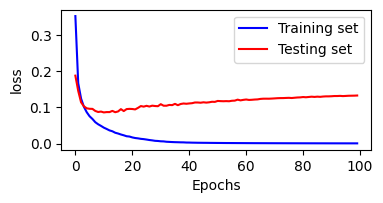

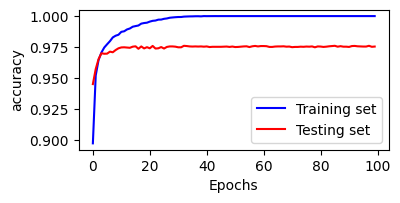

In [32]:
plot_hist_var(hist_ANN,'loss')
plot_hist_var(hist_ANN,'accuracy')

In [33]:
score =  model.evaluate(x_test, y_test)
print(model.metrics_names)


313/313 [==============================] - 1s 3ms/step - loss: 0.1330 - accuracy: 0.9755
['loss', 'accuracy']
